In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [35]:
agua = ctrl.Antecedent(np.arange(0,101,1),'agua') 
sol = ctrl.Antecedent(np.arange(0,101,1),'sol')
tip = ctrl.Consequent(np.arange(0,101,1),'tip')

In [36]:
agua['pouco'] = fuzz.trapmf(agua.universe,[0,0,10,30])
agua['ideal'] = fuzz.trimf(agua.universe,[10,30,50])
agua['muito'] = fuzz.trapmf(agua.universe,[30,50,100,100])

sol['pouco'] = fuzz.trapmf(sol.universe,[0,0,20,45])
sol['ideal'] = fuzz.trimf(sol.universe,[20,45,70])
sol['muito'] = fuzz.trapmf(sol.universe,[45,70,120,120])

tip['errado'] = fuzz.trapmf(tip.universe,[0,0,25,50])
tip['regular'] = fuzz.trimf(tip.universe,[25,50,75])
tip['ideal'] = fuzz.trapmf(tip.universe,[50,75,100,100])

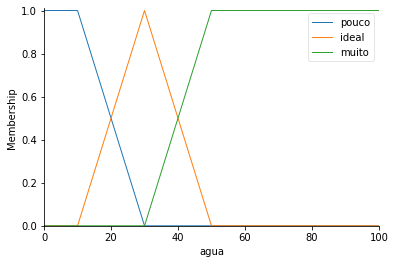

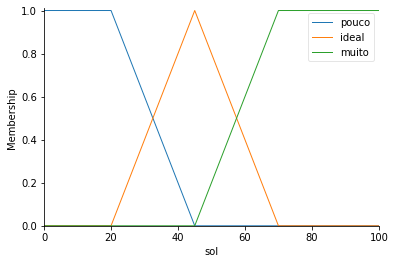

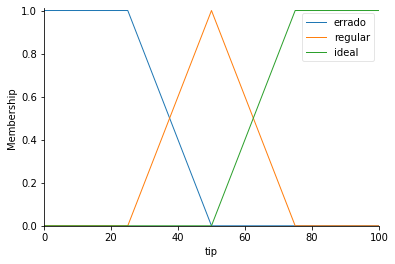

In [37]:
agua.view()
sol.view()
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x177afe8d288>)

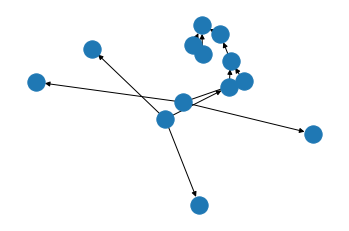

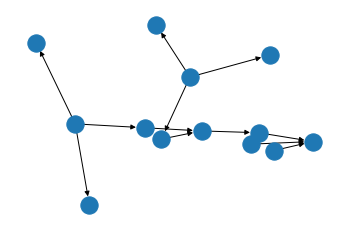

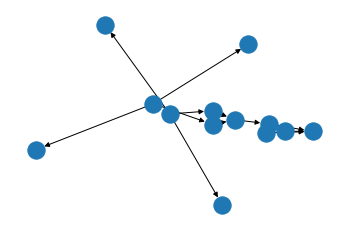

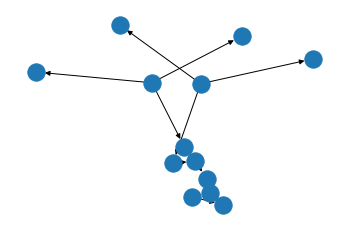

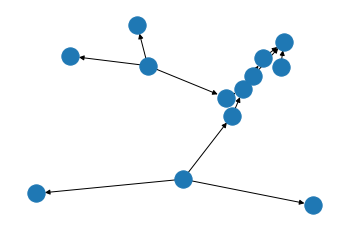

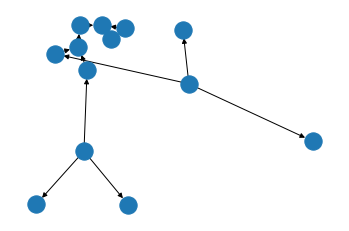

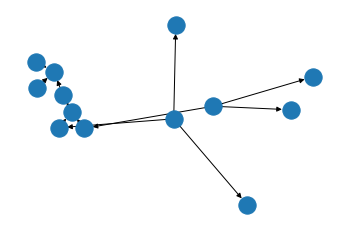

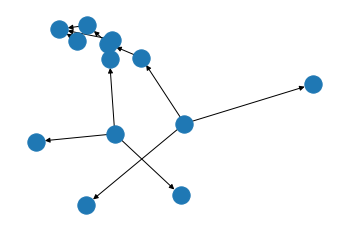

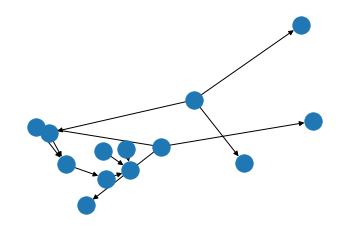

In [38]:
regra1 = ctrl.Rule(agua['pouco'] | sol['pouco'], tip['regular'])
regra2 = ctrl.Rule(agua['pouco'] | sol['ideal'], tip['regular'])
regra3 = ctrl.Rule(agua['pouco'] | sol['muito'], tip['errado'])
regra4 = ctrl.Rule(agua['ideal'] | sol['pouco'], tip['ideal'])
regra5 = ctrl.Rule(agua['ideal'] | sol['ideal'], tip['ideal'])
regra6 = ctrl.Rule(agua['ideal'] | sol['muito'], tip['regular'])
regra7 = ctrl.Rule(agua['muito'] | sol['pouco'], tip['errado'])
regra8 = ctrl.Rule(agua['muito'] | sol['ideal'], tip['errado'])
regra9 = ctrl.Rule(agua['muito'] | sol['muito'], tip['errado'])

regra1.view()
regra2.view()
regra3.view()
regra4.view()
regra5.view()
regra6.view()
regra7.view()
regra8.view()
regra9.view()

In [39]:
# Sistema de criação de controle / simulação

tipping_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

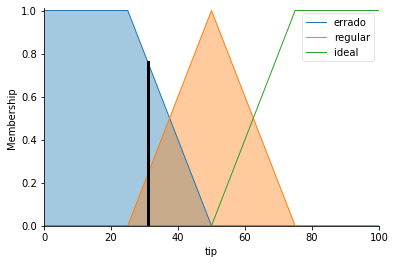

In [44]:
# Saída fuzzyficada
# Input
tipping.input['agua'] = 12000
tipping.input['sol'] = 100000

# Output fuzzy
tipping.compute()

# Valor fuzzy computado
tipping.output['tip']
tip.view(sim=tipping)